In [18]:
from pymongo import MongoClient

# MongoDB credentials and connection details
mongo_user = 'admin'  
mongo_pass = 'Welcome@123'  
mongo_host = 'localhost'
mongo_port = 27017  # Default MongoDB port
mongo_db_name = 'bigdataproject'  # The database we want to connect to

# Create a MongoDB client
client = MongoClient(
    host=mongo_host,
    port=mongo_port,
    username=mongo_user,
    password=mongo_pass,
    authSource='admin'
)

# Connect to the database
db = client[mongo_db_name]

# List collections in the database
collections = db.list_collection_names()
print("Collections in the database:")
for collection_name in collections:
    collection = db[collection_name]
    count = collection.count_documents({})
    print(f"Collection: {collection_name}, Documents: {count}")



Collections in the database:
Collection: trades, Documents: 16998


In [33]:
# List collections in the database
collections = db.list_collection_names()
print("Collections in the database:")
for collection_name in collections:
    collection = db[collection_name]
    count = collection.count_documents({})
    print(f"Collection: {collection_name}, Documents: {count}")


Collections in the database:
Collection: trades, Documents: 17011


In [19]:
from pymongo import MongoClient
import pandas as pd


# Load data from MongoDB into a DataFrame
data = pd.DataFrame(list(collection.find()))

# Display the first few rows of the dataframe to understand its structure
print(data.head())

                        _id            symbol_id  time_exchange  \
0  662c11d754be98d01904c6fc  KRAKEN_SPOT_BTC_USD  1714071551752   
1  662c11d754be98d01904c6fd  KRAKEN_SPOT_BTC_USD  1714071364025   
2  662c11d754be98d01904c6fe  KRAKEN_SPOT_BTC_USD  1714071379229   
3  662c11d754be98d01904c6ff  KRAKEN_SPOT_BTC_USD  1714071498723   
4  662c11d754be98d01904c700  KRAKEN_SPOT_BTC_USD  1714071498723   

             timestamp                                               uuid  \
0  2024-04-25 11:59:11  df1fd8d4e6f95cf4d9ee7c7730581afc02d6ce49edbbc0...   
1  2024-04-25 11:56:04  710f34bd5d0014c1d05dd0f5fd41bc1fc0427fdb01c737...   
2  2024-04-25 11:56:19  875a42aa6d01d95c78e9003e7c43bf00bd2b49adc96ddc...   
3  2024-04-25 11:58:18  14aa149613f9326999564bf83ded27ce11bc7a94bb0edd...   
4  2024-04-25 11:58:18  d3c46ca509be3b730560cd930427cf30accccb820ea0c5...   

  taker_side    price  min_buy_price  max_sell_price  price_diff  \
0       SELL  64457.9        64458.0         64477.6        19.6  

In [4]:
# analyzing price difference witinin kmeans cluster

               count        mean         std     min    25%    50%    75%  \
time_cluster                                                                
0             3614.0  148.053830  160.691363 -192.60    0.0   96.0  297.0   
1             3251.0   91.318782   76.730041  -35.06    1.0   62.0  173.0   
2             3103.0  150.056026  159.298857 -192.60    0.0  118.0  307.0   
3             3484.0  214.299793  142.676281  -44.00  125.0  227.0  299.2   
4             3546.0  179.278827  154.327100  -44.00   25.5  114.4  299.2   

                max  
time_cluster         
0             466.0  
1             188.6  
2             431.0  
3             434.6  
4             434.6  


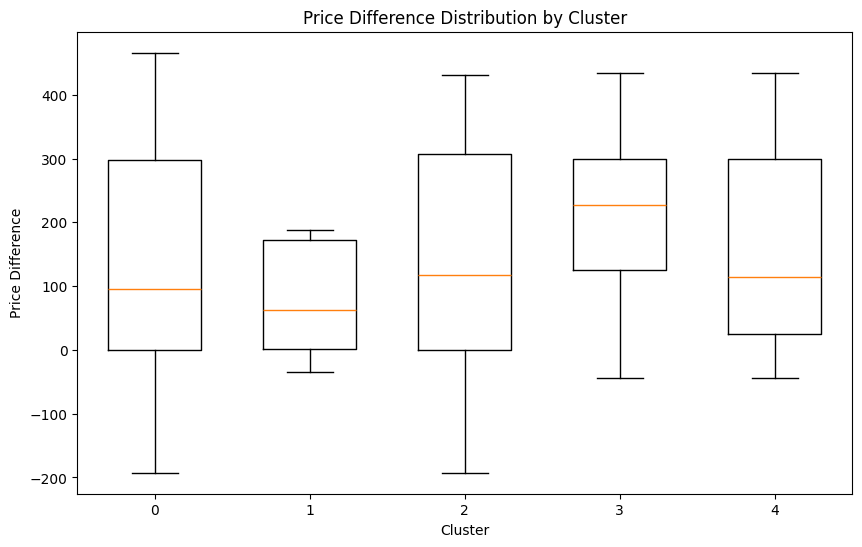

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert timestamp to datetime for better handling
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Group data by cluster and summarize price differences
cluster_price_diff_summary = data.groupby('time_cluster')['price_diff'].describe()
print(cluster_price_diff_summary)

# Visualize price differences within each cluster
fig, ax = plt.subplots(figsize=(10, 6))
for cluster, group_data in data.groupby('time_cluster'):
    ax.boxplot(group_data['price_diff'], positions=[cluster], widths=0.6)

ax.set_xlabel('Cluster')
ax.set_ylabel('Price Difference')
ax.set_title('Price Difference Distribution by Cluster')
ax.set_xticks(range(len(cluster_price_diff_summary)))
ax.set_xticklabels(cluster_price_diff_summary.index)
plt.show()


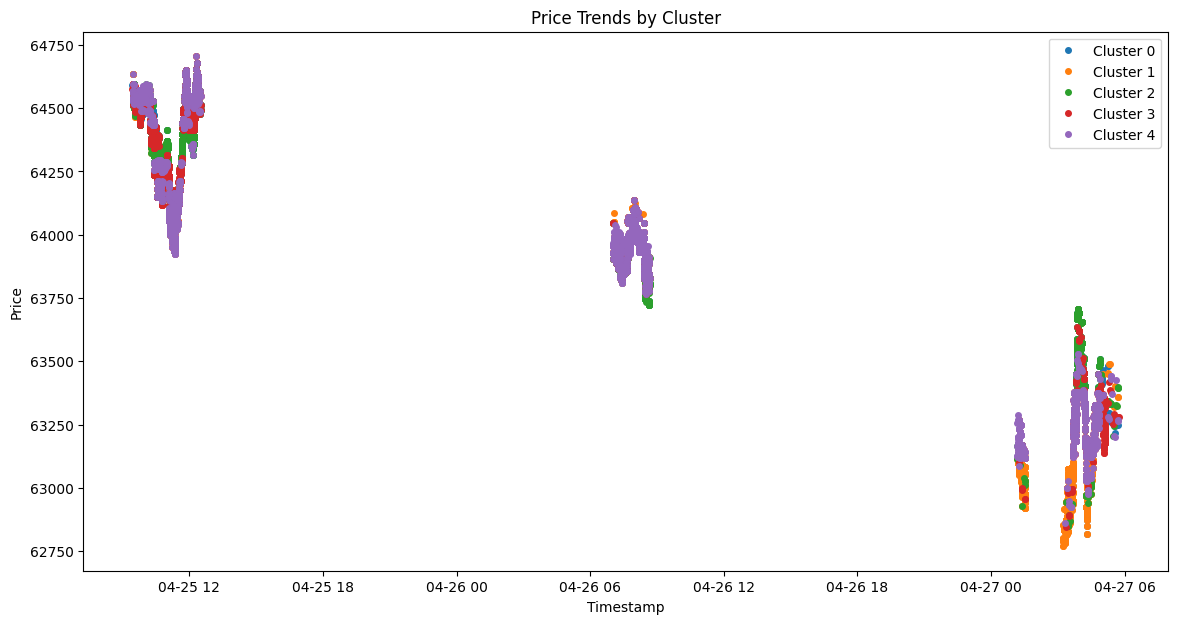

In [26]:
#temperol trends within clusters

# Plot price over time for each cluster
fig, ax = plt.subplots(figsize=(14, 7))
for cluster, group_data in data.groupby('time_cluster'):
    ax.plot(group_data['timestamp'], group_data['price'], marker='o', linestyle='', markersize=4, label=f'Cluster {cluster}')

ax.set_title('Price Trends by Cluster')
ax.set_xlabel('Timestamp')
ax.set_ylabel('Price')
ax.legend()
plt.show()


taker_side     BUY  SELL
time_cluster            
0             1703  1911
1              999  2252
2             1482  1621
3             1574  1910
4             1738  1808


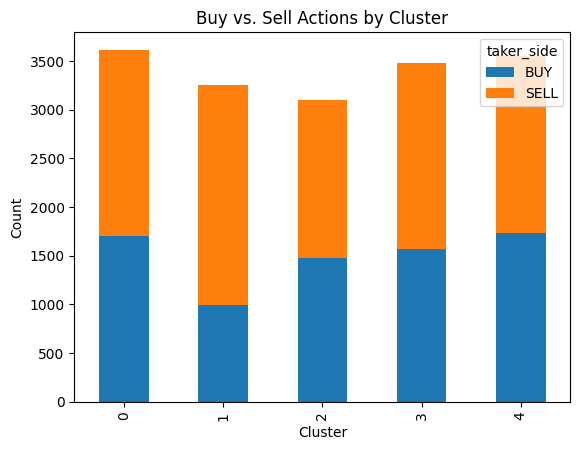

In [27]:
#analyzing Buy and Sell Side Behavior
# Count buy and sell actions within each cluster
buy_sell_counts = data.groupby(['time_cluster', 'taker_side']).size().unstack(fill_value=0)
print(buy_sell_counts)

# Visualize the count of buy and sell actions in each cluster
buy_sell_counts.plot(kind='bar', stacked=True)
plt.title('Buy vs. Sell Actions by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()


In [8]:
#understanding LSH output
# Let's first examine the hash structure in your dataset
print(data['hashes'].head())


0    [{'type': 1, 'values': [-16563.0]}, {'type': 1...
1    [{'type': 1, 'values': [-16570.0]}, {'type': 1...
2    [{'type': 1, 'values': [-16570.0]}, {'type': 1...
3    [{'type': 1, 'values': [-16563.0]}, {'type': 1...
4    [{'type': 1, 'values': [-16563.0]}, {'type': 1...
Name: hashes, dtype: object


In [9]:
# Extract the first hash value from each list for simplicity
data['first_hash_value'] = data['hashes'].apply(lambda hashes: hashes[0]['values'][0])

# Display the extracted hash values to check
print(data['first_hash_value'].head())

0   -16563.0
1   -16570.0
2   -16570.0
3   -16563.0
4   -16563.0
Name: first_hash_value, dtype: float64


Distribution of entries per hash bucket:
first_hash_value
-2618.0     274
-3668.0     252
-2617.0     238
-2613.0     169
-2620.0     153
           ... 
-16681.0      1
-14325.0      1
-14294.0      1
-47822.0      1
-14730.0      1
Name: count, Length: 1192, dtype: int64


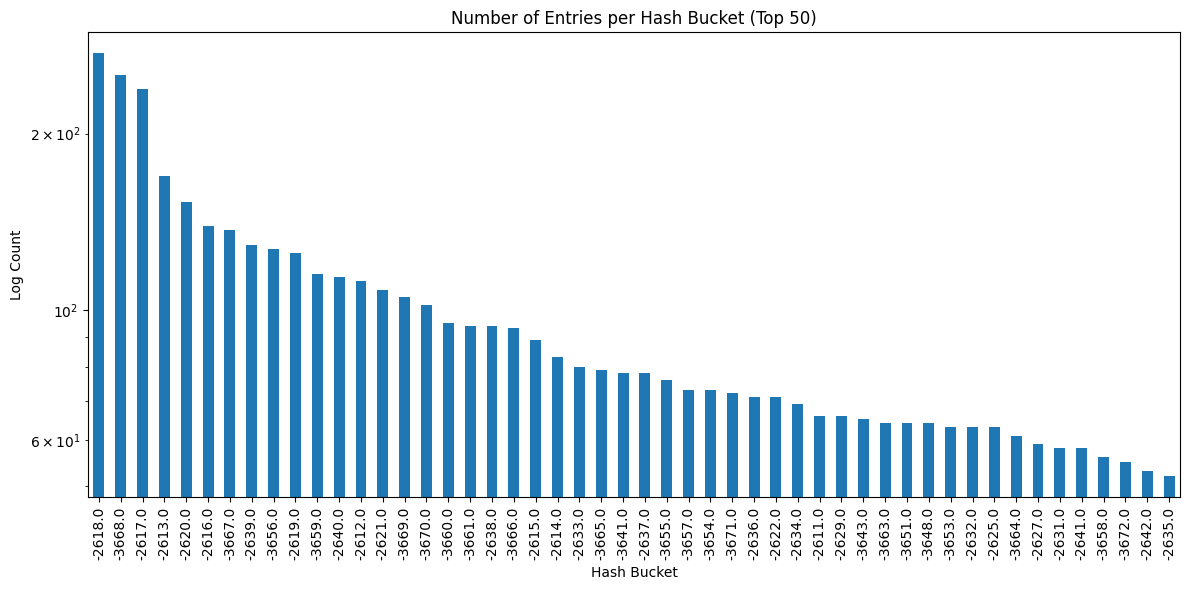

In [10]:
#analyzing the distribution of LSH hash bukcets
# Count the number of entries per hash bucket
hash_bucket_counts = data['first_hash_value'].value_counts()
print("Distribution of entries per hash bucket:")
print(hash_bucket_counts)

# Visualize the distribution
import matplotlib.pyplot as plt

#  `hash_bucket_counts` is a Series with index as hash buckets and values as counts
top_n = 50  # Adjust this to display top N buckets
plt.figure(figsize=(12, 6))
hash_bucket_counts.head(top_n).plot(kind='bar')
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.title('Number of Entries per Hash Bucket (Top {})'.format(top_n))
plt.xlabel('Hash Bucket')
plt.ylabel('Log Count')
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.tight_layout()  # Adjust layout so everything fits without overlapping
plt.show()



                      min      max     mean  std
first_hash_value                                
-62468.0          63871.0  63871.0  63871.0  NaN
-62467.0          63870.0  63870.0  63870.0  NaN
-62464.0          63867.7  63867.7  63867.7  NaN
-62451.0          63854.0  63854.0  63854.0  0.0
-62450.0          63852.8  63852.8  63852.8  NaN
...                   ...      ...      ...  ...
 24860.0          64561.5  64561.5  64561.5  NaN
 24862.0          64566.0  64566.0  64566.0  0.0
 24866.0          64576.0  64576.0  64576.0  NaN
 24871.0          64590.5  64590.5  64590.5  NaN
 24889.0          64636.0  64636.0  64636.0  NaN

[1192 rows x 4 columns]


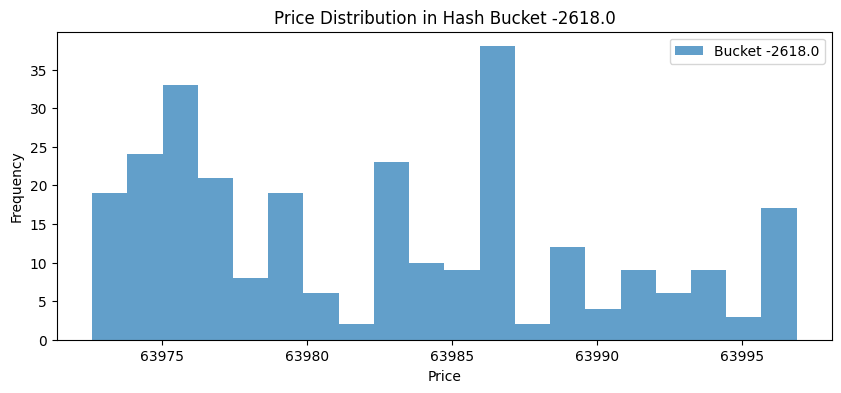

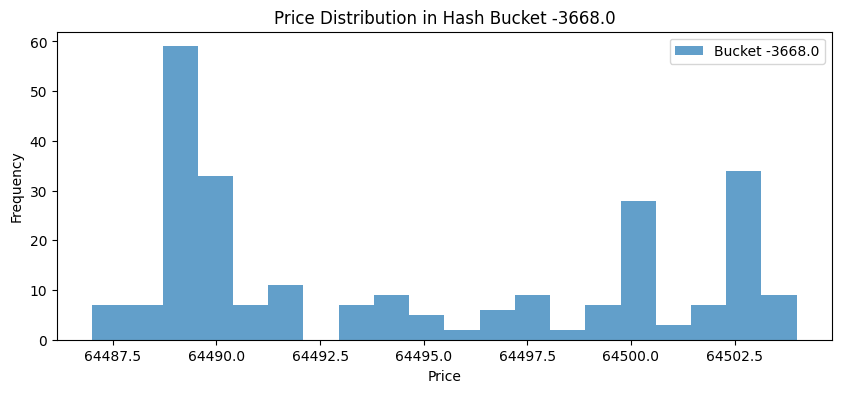

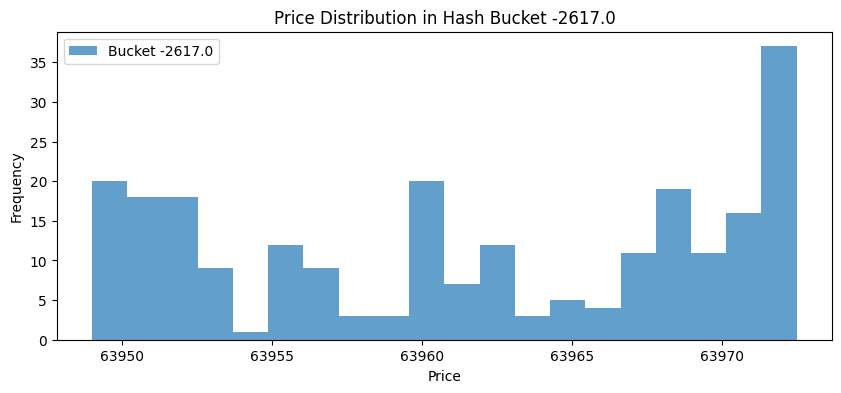

In [11]:
#price distribution within buckets
# Group by hash value and summarize price statistics
price_stats_per_hash = data.groupby('first_hash_value')['price'].agg(['min', 'max', 'mean', 'std'])
print(price_stats_per_hash)

# Visualize price range within a few selected buckets
for hash_value in hash_bucket_counts.head(3).index:  # Select top 3 buckets for visualization
    plt.figure(figsize=(10, 4))
    bucket_prices = data[data['first_hash_value'] == hash_value]['price']
    plt.hist(bucket_prices, bins=20, alpha=0.7, label=f'Bucket {hash_value}')
    plt.title(f'Price Distribution in Hash Bucket {hash_value}')
    plt.xlabel('Price')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()


In [12]:
# Calculate potential arbitrage opportunities by examining price differences in each bucket
arbitrage_opportunities = data.groupby('first_hash_value').agg(min_price=('price', 'min'), max_price=('price', 'max'))
arbitrage_opportunities['price_diff'] = arbitrage_opportunities['max_price'] - arbitrage_opportunities['min_price']
print(arbitrage_opportunities)

# Highlight buckets with significant price differences for arbitrage
significant_arbitrage = arbitrage_opportunities[arbitrage_opportunities['price_diff'] > 50]  # Arbitrary threshold
print("Buckets with significant price differences for arbitrage:")
print(significant_arbitrage)


                  min_price  max_price  price_diff
first_hash_value                                  
-62468.0            63871.0    63871.0         0.0
-62467.0            63870.0    63870.0         0.0
-62464.0            63867.7    63867.7         0.0
-62451.0            63854.0    63854.0         0.0
-62450.0            63852.8    63852.8         0.0
...                     ...        ...         ...
 24860.0            64561.5    64561.5         0.0
 24862.0            64566.0    64566.0         0.0
 24866.0            64576.0    64576.0         0.0
 24871.0            64590.5    64590.5         0.0
 24889.0            64636.0    64636.0         0.0

[1192 rows x 3 columns]
Buckets with significant price differences for arbitrage:
                  min_price  max_price  price_diff
first_hash_value                                  
-19900.0           64297.00    64594.0      297.00
-19899.0           64293.00    64588.0      295.00
-19895.0           64283.00    64575.0      292.00

### Fairness Analysis of Implemented concepts

In [31]:


# MongoDB aggregation pipeline to extract exchange from symbol_id and count
pipeline = [
    {"$addFields": {
        "exchange": {"$arrayElemAt": [{"$split": ["$symbol_id", "_"]}, 0]}
    }},
    {"$group": {
        "_id": "$symbol_id",
        "count": {"$sum": 1},
        "exchanges": {"$addToSet": "$exchange"}  # Now this should work since 'exchange' is explicitly defined
    }},
    {"$sort": {"count": -1}}  # Optional: sorts by the most frequent symbol_id
]

# Execute the aggregation pipeline
results = list(collection.aggregate(pipeline))

# Print results
for result in results:
    print(f"Symbol ID: {result['_id']}, Count: {result['count']}, Exchanges: {result['exchanges']}")


Symbol ID: KRAKEN_SPOT_BTC_USD, Count: 4783, Exchanges: ['KRAKEN']
Symbol ID: BITSTAMP_SPOT_BTC_USD, Count: 3388, Exchanges: ['BITSTAMP']
Symbol ID: BITFINEX_SPOT_BTC_USDT, Count: 3073, Exchanges: ['BITFINEX']
Symbol ID: BITFINEX_SPOT_BTC_USD, Count: 3072, Exchanges: ['BITFINEX']
Symbol ID: BITSTAMP_SPOT_BTC_USDT, Count: 1188, Exchanges: ['BITSTAMP']
Symbol ID: KRAKEN_SPOT_BTC_USDT, Count: 991, Exchanges: ['KRAKEN']
Symbol ID: KRAKEN_SPOT_BTC_USDC, Count: 293, Exchanges: ['KRAKEN']
Symbol ID: BITSTAMP_SPOT_BTC_USDC, Count: 215, Exchanges: ['BITSTAMP']


In [20]:
#Fairness Check Across Clusters
#Compute Average Price Difference per Cluster

# Calculate average price difference per time cluster
average_price_diff_per_cluster = data.groupby('time_cluster')['price_diff'].mean().reset_index()
average_price_diff_per_cluster.columns = ['time_cluster', 'average_price_diff']

print(average_price_diff_per_cluster)


   time_cluster  average_price_diff
0             0          148.053830
1             1           91.318782
2             2          150.056026
3             3          214.299793
4             4          179.278827


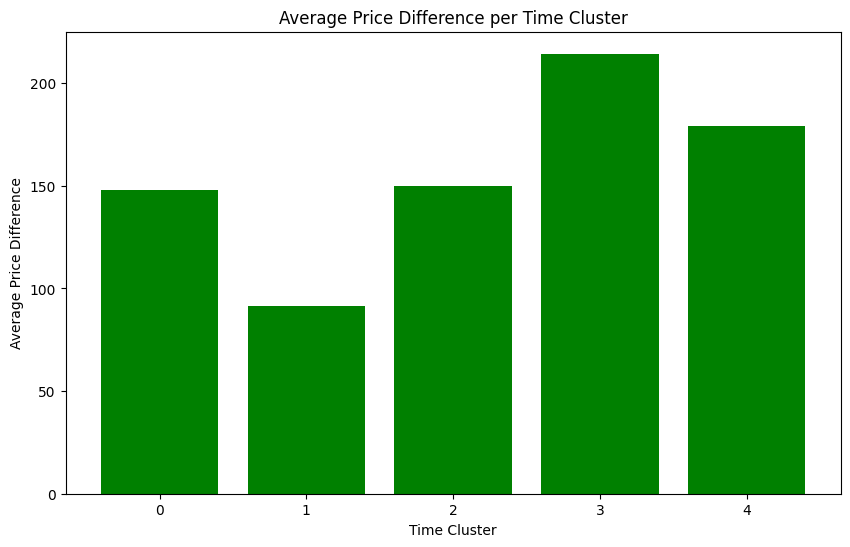

In [24]:
#visualize the results
import matplotlib.pyplot as plt

# Plotting the average price difference per cluster
plt.figure(figsize=(10, 6))
plt.bar(average_price_diff_per_cluster['time_cluster'], average_price_diff_per_cluster['average_price_diff'], color='green')
plt.xlabel('Time Cluster')
plt.ylabel('Average Price Difference')
plt.title('Average Price Difference per Time Cluster')
plt.xticks(average_price_diff_per_cluster['time_cluster'])
plt.show()


In [22]:
#statistical analysis for fairness
import scipy.stats as stats

# Example: ANOVA test across clusters to see if there are statistically significant differences
f_value, p_value = stats.f_oneway(*[data[data['time_cluster'] == cluster]['price_diff'] for cluster in data['time_cluster'].unique()])
print(f"F-Value: {f_value}, P-Value: {p_value}")


F-Value: 339.0885812280926, P-Value: 2.7177521964715263e-281


In [28]:
#Data Ingestion check
# Count the number of records for each symbol_id
symbol_counts = data['symbol_id'].value_counts().reset_index()
symbol_counts.columns = ['symbol_id', 'count']

print(symbol_counts)


                symbol_id  count
0     KRAKEN_SPOT_BTC_USD   4782
1   BITSTAMP_SPOT_BTC_USD   3387
2  BITFINEX_SPOT_BTC_USDT   3073
3   BITFINEX_SPOT_BTC_USD   3069
4  BITSTAMP_SPOT_BTC_USDT   1188
5    KRAKEN_SPOT_BTC_USDT    991
6    KRAKEN_SPOT_BTC_USDC    293
7  BITSTAMP_SPOT_BTC_USDC    215


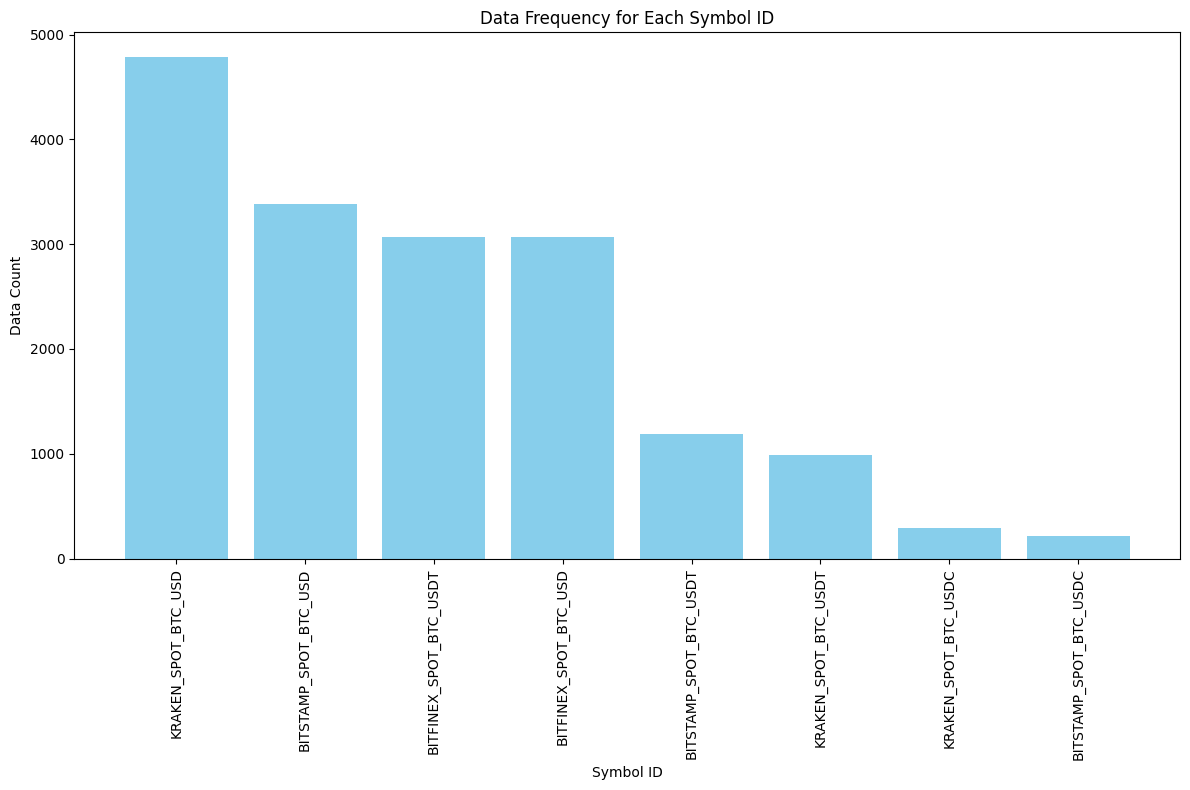

In [30]:
import matplotlib.pyplot as plt

# Plotting the data count for each symbol
plt.figure(figsize=(12, 8))
plt.bar(symbol_counts['symbol_id'], symbol_counts['count'], color='skyblue')
plt.xlabel('Symbol ID')
plt.ylabel('Data Count')
plt.title('Data Frequency for Each Symbol ID')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [32]:
#analyze data check
# Calculate average price difference for each symbol
avg_price_diff_per_symbol = data.groupby('symbol_id')['price_diff'].mean().reset_index()
avg_price_diff_per_symbol.columns = ['symbol_id', 'average_price_diff']

print(avg_price_diff_per_symbol)


                symbol_id  average_price_diff
0   BITFINEX_SPOT_BTC_USD          165.969371
1  BITFINEX_SPOT_BTC_USDT          152.305239
2   BITSTAMP_SPOT_BTC_USD          174.882787
3  BITSTAMP_SPOT_BTC_USDC           82.162791
4  BITSTAMP_SPOT_BTC_USDT          144.039562
5     KRAKEN_SPOT_BTC_USD          159.596926
6    KRAKEN_SPOT_BTC_USDC           67.309386
7    KRAKEN_SPOT_BTC_USDT          139.748537
